## Ask and Prepare
* **What type of company does your client represent, and what are they asking you to accomplish?**
    * NFL management and ownership, answering style of quarterback teams should pursue to lead a high-powered offense.
* **What are the key factors involved in the business task you are investigating?**
    * The key factors involved in analyzing the relationship between a quarterback's archetype and their ability to throw touchdowns efficiently.
* **What type of data will be appropriate for your analysis?**
    * Historical data going back to 2001
    * For the purposes of this project, **Checkdown Specialists** have a lower than league average Yards per Attempt, and **Gunslingers** will have a higher than league average value for the respective year
* **Where will you obtain that data?**
    * Public Kaggle dataset
* **Who is your audience, and what materials will help you present to them effectively?**
    * NFL management and ownership
    * A document highlighting the final analysis of the project
* **Are there any errors in the data?**
    * There is missing data from 2007, as players from 2023 are incorrectly entered.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# Load the data locally
file_path = '/kaggle/input/nfl-passing-statistics-2001-2023/passing_cleaned.csv'

df = pd.read_csv(file_path)
print(df.columns)

# Check players in the year 2007
year_to_check = 2007
players_in_year = df.loc[df['Year'] == year_to_check]
print(players_in_year.head())

# Note players from 2023 were incorrectly entered into 2007

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

Index(['Unnamed: 0', 'Player', 'Tm', 'Age', 'G', 'GS', 'Cmp', 'Att', 'Cmp%',
       'Yds', 'TD', 'TD%', 'Int', 'Int%', '1D', 'Lng', 'Y/A', 'AY/A', 'Y/C',
       'Y/G', 'Rate', 'Sk', 'Yds-s', 'Sk%', 'NY/A', 'ANY/A', 'Year'],
      dtype='object')
     Unnamed: 0          Player   Tm  Age   G  GS  Cmp  Att  Cmp%   Yds  ...  \
646         659  Tua Tagovailoa  MIA   25  17  17  388  560  69.3  4624  ...   
647         660      Jared Goff  DET   29  17  17  407  605  67.3  4575  ...   
648         661    Dak Prescott  DAL   30  17  17  410  590  69.5  4516  ...   
649         662      Josh Allen  BUF   27  17  17  385  579  66.5  4306  ...   
650         663     Brock Purdy  SFO   24  16  16  308  444  69.4  4280  ...   

     AY/A   Y/C    Y/G   Rate  Sk  Yds-s  Sk%  NY/A  ANY/A  Year  
646   8.2  11.9  272.0  101.1  29    171  4.9  7.56   7.48  2007  
647   7.7  11.2  269.1   97.9  30    197  4.7  6.89   6.99  2007  
648   8.2  11.0  265.6  105.9  39    255  6.2  6.77   7.28  2007  
649  

## Process

In [2]:
# Create new table with relevant columns and filter out players with less than 250 passing attempts in a season
new_df = df[['Player', 'Year', 'G', 'Rate', 'Yds','Att', 'Y/C', 'Y/A', 'Y/G', 'Cmp%', 'TD', 'TD%', 'Int%']].copy()
new_df['Att/G'] = new_df['Att'] / new_df['G']

filtered_df = new_df[new_df['Att'] >= 250]

# Filter out rows where the year is 2007
filtered_df = filtered_df[filtered_df['Year'] != 2007]

filtered_df.head()



,Player,Year,G,Rate,Yds,Att,Y/C,Y/A,Y/G,Cmp%,TD,TD%,Int%,Att/G
0,Kurt Warner,2001,16,101.4,4830,546,12.9,8.8,301.9,68.7,36,6.6,4.0,34.1250
1,Peyton Manning,2001,16,84.1,4131,547,12.0,7.6,258.2,62.7,26,4.8,4.2,34.1875
2,Brett Favre,2001,16,94.1,3921,510,12.5,7.7,245.1,61.6,32,6.3,2.9,31.8750
3,Aaron Brooks,2001,16,76.4,3832,558,12.3,6.9,239.5,55.9,26,4.7,3.9,34.8750
4,Rich Gannon,2001,16,95.5,3828,549,10.6,7.0,239.3,65.8,27,4.9,1.6,34.3125


In [3]:
# Calculate yearly averages for Y/A to compare with and determine quarterback archetype. 
        # > More Than 8 YPA = Gunslinger, Less Than 8 YPA = Checkdown Artist

# Group by 'Year' and perform calculations
calculated_df = filtered_df.groupby('Year').apply(lambda x: pd.Series({
    'Average Y/A': x['Y/A'].mean(),
    'Average TD Thrown': x['TD'].mean(),   # Difference between averages of B and C
    'Average Passer Rate': x['Rate'].mean(),  # Ratio of averages of A to B
    'Amount of Gunslingers': (x['Y/A'] > 8).sum(),        # Count of rows where A > 20
    'Amount of Checkdown Specialist': (x['Y/A'] <= 8).sum()       # Count of rows where B < 200
})).reset_index()

# Display the result
print(calculated_df)

    Year  Average Y/A  Average TD Thrown  Average Passer Rate  \
0   2001     6.826667          18.500000            79.656667   
1   2002     6.773333          18.700000            82.010000   
2   2003     6.762069          18.172414            80.017241   
3   2004     7.254839          20.419355            86.216129   
4   2005     6.906250          16.843750            82.653125   
5   2006     6.816667          17.166667            80.150000   
6   2008     7.019355          18.064516            84.745161   
7   2009     7.172414          21.137931            85.455172   
8   2010     7.116129          20.741935            85.945161   
9   2011     7.254545          20.333333            84.775758   
10  2012     7.096875          21.687500            85.634375   
11  2013     7.138235          21.147059            86.817647   
12  2014     7.266667          23.066667            89.773333   
13  2015     7.354545          22.939394            91.387879   
14  2016     7.240000    

/tmp/ipykernel_17/2576462513.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  calculated_df = filtered_df.groupby('Year').apply(lambda x: pd.Series({


## Analyze
* **How should you organize your data to perform analysis on it?**
* **Has your data been properly formatted?**
* **What surprises did you discover in the data?**
* **What trends or relationships did you find in the data?**
* **How will these insights help answer your business questions?**

In [4]:
# Calculate ranking
categories = ['Rate', 'Y/G', 'Y/C', 'Cmp%', 'TD', 'TD%', 'Int%']
ranks = filtered_df[categories].rank(axis=0, ascending=[False, False, False, False, False, False, True])
filtered_df.loc[:, 'Rank'] = ranks.sum(axis=1)

# Find best and runner-up QBs each year
best_qb_each_year = filtered_df.loc[filtered_df.groupby('Year')['Rank'].idxmax()].copy()
runner_up_each_year = filtered_df.groupby('Year', group_keys=False).apply(
    lambda x: x.nlargest(2, 'Rank').iloc[1]
).reset_index(drop=True).copy()

# Merge best and runner-up DataFrames
result = best_qb_each_year[['Year', 'Player']].merge(
    runner_up_each_year[['Year', 'Player']],
    on='Year',
    suffixes=('', ' Runner-Up')
)

# Rename columns for clarity
result.rename(columns={'Player': 'Best Player', 'Player Runner-Up': 'Runner-Up'}, inplace=True)

# Display the result
print(result)


    Year       Best Player         Runner-Up
0   2001       Kurt Warner       Brett Favre
1   2002       Trent Green    Peyton Manning
2   2003  Daunte Culpepper       Brett Favre
3   2004    Peyton Manning  Daunte Culpepper
4   2005    Peyton Manning     Carson Palmer
5   2006    Peyton Manning     Carson Palmer
6   2008        Drew Brees     Philip Rivers
7   2009        Drew Brees    Peyton Manning
8   2010     Philip Rivers     Aaron Rodgers
9   2011     Aaron Rodgers        Drew Brees
10  2012        Drew Brees    Peyton Manning
11  2013    Peyton Manning        Drew Brees
12  2014    Peyton Manning         Tony Romo
13  2015     Carson Palmer    Russell Wilson
14  2016         Matt Ryan         Tom Brady
15  2017         Tom Brady  Matthew Stafford
16  2018   Patrick Mahomes     Philip Rivers
17  2019   Jimmy Garoppolo    Jameis Winston
18  2020      Kirk Cousins    Deshaun Watson
19  2021        Joe Burrow  Matthew Stafford
20  2022   Patrick Mahomes    Tua Tagovailoa
21  2023  

/tmp/ipykernel_17/3790350791.py:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  runner_up_each_year = filtered_df.groupby('Year', group_keys=False).apply(


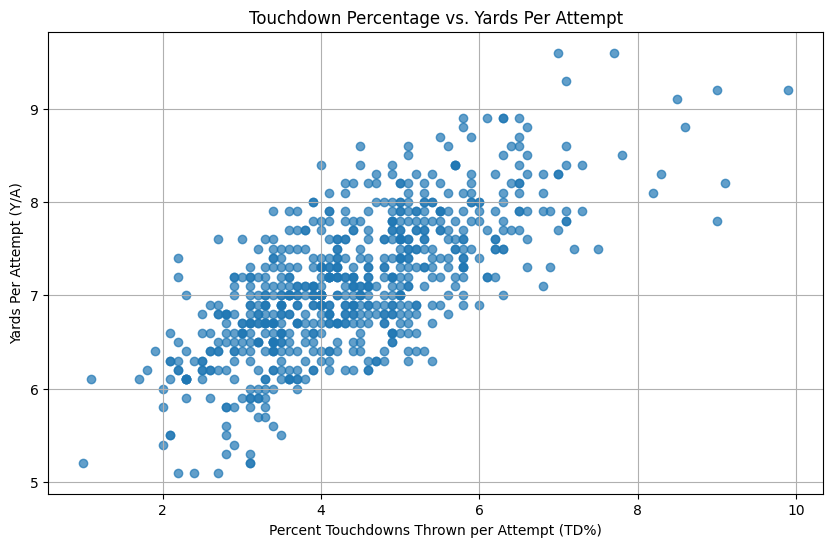

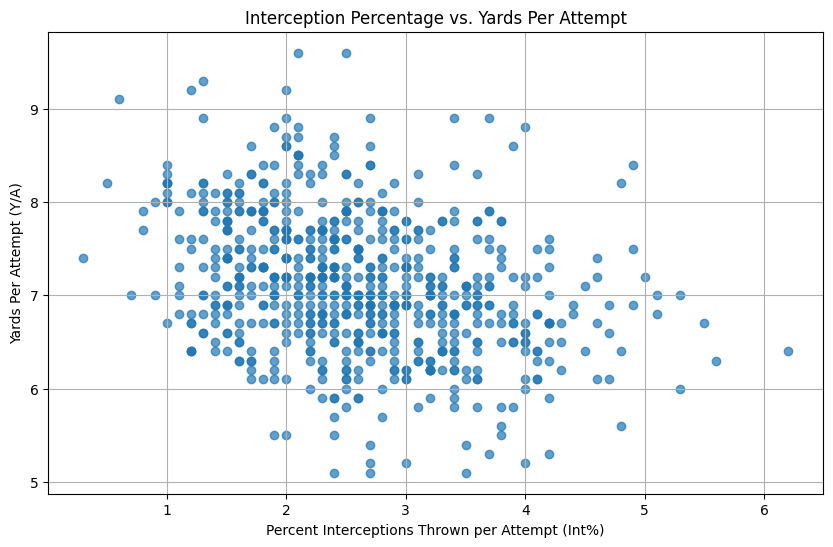

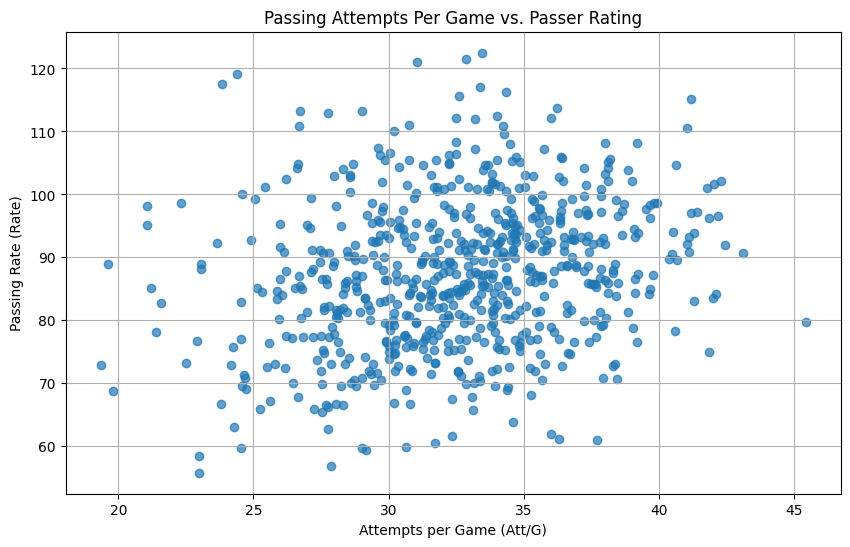

In [5]:
import matplotlib.pyplot as plt

# Create the scatterplot to display % touchdowns thrown vs yards per attempt
plt.figure(figsize=(10, 6))
plt.scatter(filtered_df['TD%'], filtered_df['Y/A'], alpha=0.7)
plt.title('Touchdown Percentage vs. Yards Per Attempt')
plt.xlabel('Percent Touchdowns Thrown per Attempt (TD%)')
plt.ylabel('Yards Per Attempt (Y/A)')
plt.grid(True)
plt.show()

import matplotlib.pyplot as plt

# Create the scatterplot to display % interceptions thrown vs yards per attempt
plt.figure(figsize=(10, 6))
plt.scatter(filtered_df['Int%'], filtered_df['Y/A'], alpha=0.7)
plt.title('Interception Percentage vs. Yards Per Attempt')
plt.xlabel('Percent Interceptions Thrown per Attempt (Int%)')
plt.ylabel('Yards Per Attempt (Y/A)')
plt.grid(True)
plt.show()

# Create the scatterplot to display attempts per game thrown vs yards per attempt
plt.figure(figsize=(10, 6))
plt.scatter(filtered_df['Att/G'], filtered_df['Rate'], alpha=0.7)
plt.title('Passing Attempts Per Game vs. Passer Rating')
plt.xlabel('Attempts per Game (Att/G)')
plt.ylabel('Passing Rate (Rate)')
plt.grid(True)
plt.show()

## Share
### [Click to view Interactive Tableau Dashboard](https://public.tableau.com/shared/6PSP4G8W4?:display_count=n&:origin=viz_share_link)
* **Were you able to answer the business question?**
* **What story does your data tell?**
* **How do your findings relate to your original question?**
* **Who is your audience? What is the best way to communicate with them?**
* **Can data visualization help you share your findings?**
* **Is your presentation accessible to your audience?**

## Act
* **What is your final conclusion based on your analysis?**
* **How could your team and business apply your insights?**
* **What next steps would you or your stakeholders take based on your findings?**
* **Is there additional data you could use to expand on your findings?**